# Problem Komiwojażera (Traveling Salesman)

Instancja problemu:

dane: G - reprezentacja grafu w postaci macierzy sąsiedztw z wagami (odległościami pomiędzy punktami), zawierająca n wierzchołków

szukane: Ciąg X - permutacja liczb 0...n-1 określająca kolejnośc odwiedzania wierzchołków, minimalizująca sume wag na uzyskanym cyklu (cost(X))

In [1]:
from random import randrange
import random
import math
from matplotlib import pyplot as plt
import time
import sys

In [2]:
def cost(x,G):
    '''
    Dla zadanaego rozwiązanie x wyznacz sumę odległości na cyklu
    '''
    c=0
    for i in range(len(x)-1):
        c=c+G[x[i]][x[i+1]]
    c=c+G[x[len(x)-1]][x[0]]
    return c


# Hill-Climbing

In [3]:
def gain(x,i,j,G):
    '''
    wyznacza zysk/strate w przypadku zamienienia wierzchołków i z j w podanym rozwiązaniu
    '''
    n=len(x)
#     print(G[x[i%n]][x[(i-1)%n]],G[x[j%n]][x[(j+1)%n]] , G[x[i%n]][x[(j+1)%n]],G[x[j%n]][x[(i-1)%n]])
    if(i==j):
        return 0
    if(i%n==(j+1)%n):
        return G[x[i%n]][x[(i+1)%n]]+G[x[j%n]][x[(j-1)%n]] - G[x[i%n]][x[(j-1)%n]]-G[x[j%n]][x[(i+1)%n]]
    if(i%n==(j-1)%n):
        return G[x[i%n]][x[(i-1)%n]]+G[x[j%n]][x[(j+1)%n]] - G[x[i%n]][x[(j+1)%n]]-G[x[j%n]][x[(i-1)%n]]
    c = G[x[i%n]][x[(i+1)%n]] + G[x[i%n]][x[(i-1)%n]] + G[x[j%n]][x[(j+1)%n]] + G[x[j%n]][x[(j-1)%n]] - G[x[(i-1)%n]][x[j]%n] - G[x[j%n]][x[(i+1)%n]] - G[x[i%n]][x[(j+1)%n]] - G[x[i%n]][x[(j-1)%n]]
    return c

In [4]:
def hill_climbing(x_start,G,max_time=3600,times_table=[3600]):
    '''
    algorytm hiil climbingu rozpoczynający od rozwiązania x
    '''
    times_table.append(float('inf'))
    start = time.time()
    time_iter=0
    partial=[]
    x=x_start.copy()
    done=False
    while done==False:
        done=True
        g0=0
        for i in range(len(x)):
            for j in range (len(x)):
                g=gain(x,i,j,G)
                if(g>g0):
                    g0=g
                    i0=i
                    j0=j
        if(g0>0):
            temp=x[i0]
            x[i0]=x[j0]
            x[j0]=temp
            done=False
        end = time.time()
        if(end-start>times_table[time_iter]):
            while(end-start>times_table[time_iter]):
                time_iter
                time_iter+=1
                partial.append(cost(x,G))
        if(end-start>max_time):
            break;
    times_table.remove(float('inf'))
    return x, cost(x,G), partial

# Simulated Annealing

In [5]:
def simulated_annealing(x_start,G,T0,a,cmax=float('inf'),max_time=3600,times_table=[3600]):
    times_table.append(float('inf'))
    start = time.time()
    time_iter=0
    partial=[]
    c=0
    T=T0
    X=x_start.copy()
    Xbest=X.copy()
    while(c<=cmax):
        j=int(randrange(len(X)))
        i=int(randrange(len(X)))
        if(gain(X,i,j,G)>0):
            temp=X[i]
            X[i]=X[j]
            X[j]=temp
            if(cost(Xbest,G)>cost(X,G)):
                Xbest=X.copy()
        else:
            r=random.uniform(0, 1)
            if(r<math.exp(gain(X,i,j,G)/T)):
                temp=X[i]
                X[i]=X[j]
                X[j]=temp
        c=c+1
        T=T*a
        end = time.time()
        if(end-start>times_table[time_iter]):
            while(end-start>times_table[time_iter]):
                time_iter+=1
                partial.append(cost(Xbest,G))
        if(end-start>max_time):
            break;
    times_table.remove(float('inf'))
    return Xbest, cost(Xbest,G),partial

# Tabu Search

In [6]:
def find_max(N,X,G):
    g0=-999999
    for k in N:
        g=gain(X,k[0],k[1],G)
        if(g>g0):
            g0=g
            i0=k[0]
            j0=k[1]
    return i0,j0

In [7]:
def tabu_search(x_start,G,L=1,cmax=float('inf'),max_time=3600,times_table=[3600]):
    times_table.append(float('inf'))
    start = time.time()
    time_iter=0
    partial=[]
    c=1
    X=x_start.copy()
    Xbest=X.copy()
    tabu=[]
    while(c<=cmax):
        N=[(i,j) for i in range(len(X)) for j in range(len(X))]
        s=max(0,c-L)
        for k in range(s,c-1):
            if(tabu[k] in N):
                N.remove(tabu[k])
        i,j=find_max(N,X,G)
        tabu.append((j,i))
        temp=X[i]
        X[i]=X[j]
        X[j]=temp
        if(cost(X,G)<cost(Xbest,G)):
            Xbest=X.copy()
        c=c+1
        end = time.time()
        if(end-start>times_table[time_iter]):
            while(end-start>times_table[time_iter]):
                time_iter+=1
                partial.append(cost(Xbest,G))
        if(end-start>max_time):
            break;
    times_table.remove(float('inf'))
    return Xbest,cost(Xbest,G),partial

#  Algorytm Genetyczny

In [8]:
def sort(P,G):
    P.sort(key=lambda a: cost(a,G))
    return P

In [9]:
def choose_population(pp,G):
    P=[0]*pp
    for i in range(pp):
        P[i]=random.sample(range(len(G)),len(G))
    return P

In [10]:
def recombination(x,y,G,h=None):
    if(h==None):
        h=randrange(10,len(x)/2)
    j=randrange(len(x))
    T=set()
    d=[0]*len(x)
    for i in range(h):
        d[i]=y[(i+j)%len(y)]
        T.add(d[i])
    i=h
    for j in range(len(y)):
        if(x[j] not in T):
            d[i]=x[j]
            i=i+1
    
    j=randrange(len(x))
    T=set()
    c=[0]*len(x)
    for i in range(h):
        c[i]=x[(i+j)%len(y)]
        T.add(c[i])
    i=h
    for j in range(len(y)):
        if(y[j] not in T):
            c[i]=y[j]
            i=i+1
    return c,d

In [11]:
def genetic(pp,G,h=None,cmax=float('inf'),max_time=3600,times_table=[3600]):
    times_table.append(float('inf'))
    start = time.time()
    time_iter=0
    partial=[]
    c=1
    P=choose_population(pp,G)
    P=sort(P,G)
    xbest=P[0]
    cbest=cost(P[0],G)
    while(c<=cmax):
        for i in range(int(pp/2-1)):
            P=P+list(recombination(P[2*i],P[2*i +1],G,h))
        P=sort(P,G)
        P=P[:int(len(P)/2)]
        ccurr=cost(P[0],G)
        if(ccurr<cbest):
            xbest=P[0]
            cbest=ccurr
        c=c+1
        end = time.time()
        if(end-start>times_table[time_iter]):
            while(end-start>times_table[time_iter]):
                time_iter+=1
                partial.append(cost(xbest,G))
        if(end-start>max_time):
            break
    times_table.remove(float('inf'))
    return xbest,cbest,partial

#  Algorytm Genetyczny ze wspomaganiem hill climbing

In [26]:
def genetic_hc(pp,G,h=None,cmax=float('inf'),max_time=3600,times_table=[3600],const=100000):
    times_table.append(float('inf'))
    start = time.time()
    time_iter=0
    partial=[]
    c=1
    P=choose_population(pp,G)
    for i in range(pp):
        P[i]=hill_climbing(P[i],G,max_time=max_time/(pp*const))[0]
    P=sort(P,G)
    xbest=P[0]
    cbest=cost(P[0],G)
    while(c<=cmax):
        for i in range(int(pp/2-1)):
            P=P+list(recombination(P[2*i],P[2*i +1],G,h))
        for i in range(pp):
            P[i]=hill_climbing(P[i],G,max_time=max_time/(const*pp))[0]
        P=sort(P,G)
        P=P[:int(len(P)/2)]
        ccurr=cost(P[0],G)
        if(ccurr<cbest):
            xbest=P[0]
            cbest=ccurr
        c=c+1
        end = time.time()
        if(end-start>times_table[time_iter]):
            while(end-start>times_table[time_iter]):
                time_iter+=1
                partial.append(cost(xbest,G))
        if(end-start>max_time):
            break
    times_table.remove(float('inf'))
    return xbest,cbest,partial

# Main

In [27]:
def main_comparison(G,times_table,max_time,pp1,pp2,L,a,const):
    x_start=random.sample(range(len(G)),len(G))
    hc_x,hc_best,hc_part=hill_climbing(x_start,G=G,max_time=max_time,times_table=times_table)
    sa_x,sa_best,sa_part=simulated_annealing(x_start,G=G,T0=T0,a=a,max_time=max_time,times_table=times_table)
    ts_x,ts_best,ts_part=tabu_search(x_start,G=G,L=L,max_time=max_time,times_table=times_table)
    gen_x,gen_best,gen_part=genetic(pp=pp1,G=G,max_time=max_time,times_table=times_table)
    gen_hc_x,gen_hc_best,gen_hc_part=genetic_hc(pp=pp2,G=G,max_time=max_time,times_table=times_table,const=const)
    
    hc_part.append(hc_best)
    sa_part.append(sa_best)
    ts_part.append(ts_best)
    gen_part.append(gen_best)
    gen_hc_part.append(gen_hc_best)

    for i in range(len(times_table)+1-len(hc_part)):
        hc_part.append(hc_best)
        
    times_table.append(max_time)
    
    print('Cykle znalezione przez różne algorytmy:')
    print('Hill-climbing:'+str(hc_x))
    print('Simulated annealing:'+str(sa_x))
    print('Tabu search:'+str(ts_x))
    print('Genetic:'+str(gen_x))
    print('Genetic with HC boosting:'+str(gen_hc_x))
    
    print('Porównanie długości cykli znalezionych przez różne algorytmy:')
    plt.figure(figsize=(20,12))
    plt.plot(times_table,hc_part)
    plt.plot(times_table,sa_part)
    plt.plot(times_table,ts_part)
    plt.plot(times_table,gen_part)
    plt.plot(times_table,gen_hc_part)
    plt.gca().legend(['hill climbing','simulated annealing','tabu search','genetic','genetic with hc boost'])
    plt.show()
    
    plt.figure(figsize=(20,12))
    plt.plot(times_table[:int(len(times_table)/2)],hc_part[:int(len(times_table)/2)])
    plt.plot(times_table[:int(len(times_table)/2)],sa_part[:int(len(times_table)/2)])
    plt.plot(times_table[:int(len(times_table)/2)],ts_part[:int(len(times_table)/2)])
    plt.plot(times_table[:int(len(times_table)/2)],gen_part[:int(len(times_table)/2)])
    plt.plot(times_table[:int(len(times_table)/2)],gen_hc_part[:int(len(times_table)/2)])
    plt.gca().legend(['hill climbing','simulated annealing','tabu search','genetic','genetic with hc boost'])
    plt.show()
    
    
    plt.figure(figsize=(20,12))
    plt.plot(times_table[int(len(times_table)/2):],hc_part[int(len(times_table)/2):])
    plt.plot(times_table[int(len(times_table)/2):],sa_part[int(len(times_table)/2):])
    plt.plot(times_table[int(len(times_table)/2):],ts_part[int(len(times_table)/2):])
    plt.plot(times_table[int(len(times_table)/2):],gen_part[int(len(times_table)/2):])
    plt.plot(times_table[int(len(times_table)/2):],gen_hc_part[int(len(times_table)/2):])
    plt.gca().legend(['hill climbing','simulated annealing','tabu search','genetic','genetic with hc boost'])
    plt.show()
    

# Przykłady

In [32]:
n=100
G=[[0 for x in range(n)] for y in range(n)]
for i in range(n):
    for j in range(n):
        G[i][j]=randrange(100)
        G[j][i]=G[i][j]
        if(i==j):
            G[i][j]=0

In [33]:
times_table=[0.01,0.05,0.1,0.3,0.5,1,2,3,5,10,15,20]
max_time=60
T0=1000
a=0.9999
L=10
pp1=64
pp2=64
const=1000000

Cykle znalezione przez różne algorytmy:
Hill-climbing:[23, 0, 79, 1, 33, 55, 41, 13, 49, 96, 74, 93, 34, 12, 73, 53, 42, 39, 85, 36, 32, 58, 24, 50, 84, 63, 35, 45, 52, 3, 14, 47, 29, 92, 82, 66, 8, 44, 21, 11, 89, 48, 83, 54, 64, 4, 56, 17, 60, 61, 99, 31, 59, 25, 51, 67, 91, 46, 68, 22, 98, 6, 72, 62, 78, 87, 38, 37, 88, 90, 95, 76, 16, 15, 71, 69, 70, 75, 43, 28, 9, 80, 40, 27, 5, 81, 30, 94, 65, 2, 77, 20, 7, 19, 97, 18, 10, 26, 86, 57]
Simulated annealing:[15, 41, 55, 9, 4, 85, 27, 40, 25, 22, 26, 92, 32, 58, 42, 11, 13, 29, 61, 74, 37, 2, 65, 6, 35, 52, 30, 48, 75, 8, 89, 7, 95, 94, 69, 47, 14, 33, 10, 20, 62, 44, 84, 17, 96, 34, 73, 43, 72, 91, 78, 12, 71, 83, 16, 99, 86, 82, 77, 67, 23, 0, 31, 59, 21, 87, 36, 88, 70, 38, 57, 50, 79, 80, 54, 60, 66, 81, 64, 56, 53, 93, 24, 28, 5, 1, 45, 76, 39, 3, 51, 97, 19, 90, 46, 68, 49, 18, 63, 98]
Tabu search:[23, 0, 79, 1, 33, 55, 41, 13, 49, 96, 74, 93, 34, 12, 73, 53, 42, 39, 85, 36, 32, 58, 24, 50, 84, 63, 35, 45, 52, 3, 14, 47, 29, 92

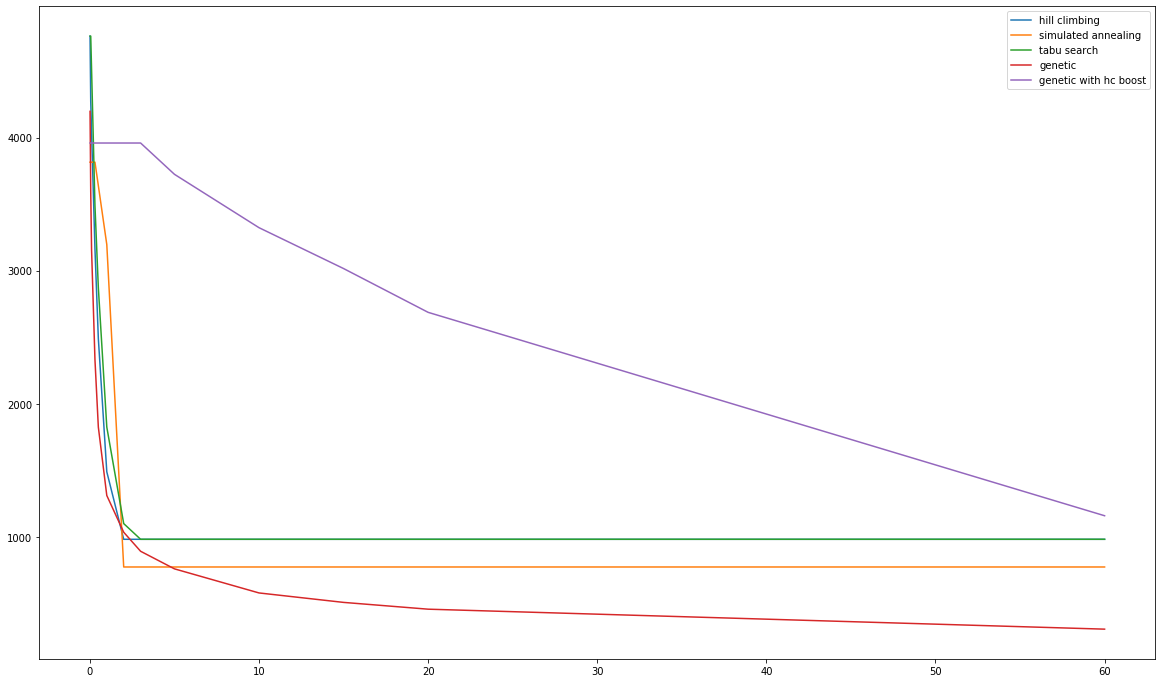

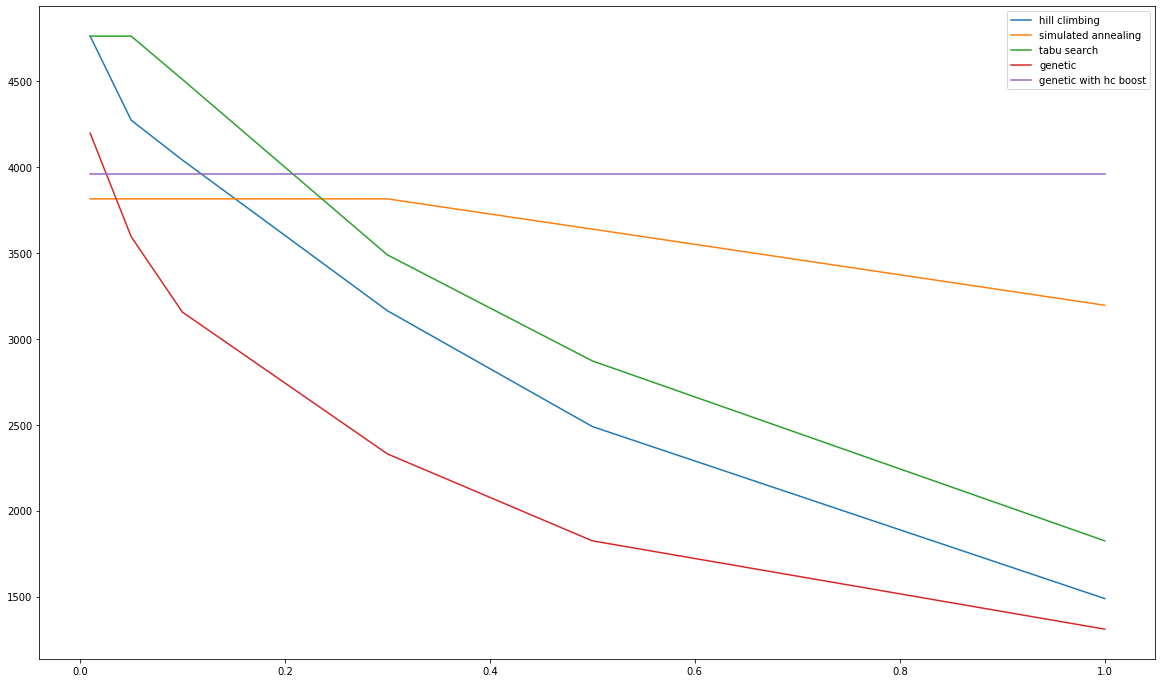

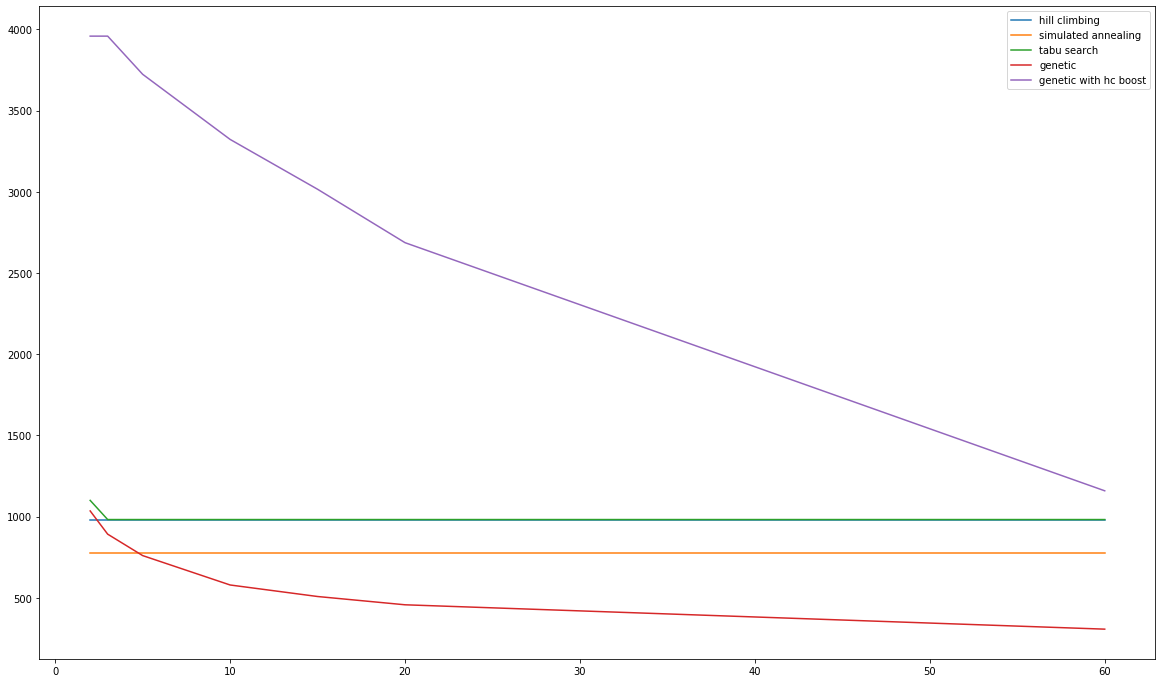

In [34]:
main_comparison(G,times_table,max_time,pp1,pp2,L,a,const)